[<img align="left" width="140px" src="https://storage.googleapis.com/static.drivetrainhub.com/img/dh_logo_text_217x80.png"/>](https://www.drivetrainhub.com)

<div align="right">© 2019 Drivetrain Hub LLC</div>

# Tooling / Basic Rack
---

**Authors**:  [Chad Glinsky](https://github.com/glinskyc)

**Description**:  Review of basic racks and their significance to manufacturing of cylindrical involute gears.

## Table of Contents

1. [Introduction](#Introduction)
2. [Geometry](#Geometry)
3. [Types](#Types)
    1. [Standard](#Standard)
    2. [Non-standard](#Non-standard)
4. [References](#References)

#### Notebook imports and settings

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
from math import radians

# notebook modules
from helper import html_table
import basic_rack as br

# settings
FIGSIZE = (6, 6)  # size of plots
plt.rcParams.update({'font.size': 12})  # set default font size

In [18]:
# DEVELOPMENT USE: %autoreload 1
# PRODUCTION USE: %autoreload 0
%load_ext autoreload
%autoreload 1
%aimport basic_rack

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Introduction

A basic rack defines the tooth profile of a gear with infinite diameter and forms the basis of a family of gears.  A basic rack is merely a set of geometric properties for describing gear tooth proportions.  It is particularly useful for defining the parameters of a generating cutting tool capable of manufacturing cylindrical involute gears.  Later chapters explain such manufacturing methods in detail.

<div class="alert alert-block alert-info" style="box-shadow: 2px 2px 4px 0px rgba(0, 0, 0, .13);">
    <b>The geometry of a cylindrical involute gear is directly dependent on the manufacturing tooling and processes used to make the gear.</b>  
<br><br>
The cost of manufacturing would be prohibitive if every gear required a different tool to make it, hence why the basic rack is of interest to gear manufacturing.  Several common methods of gear manufacturing are reviewed in later chapters.
</div>

## Geometry

The geometry of a basic rack tooth profile is reviewed here.

### Nomenclature

<table style="margin-left: 0">
    <tr>
        <th>Symbol</th>
        <th style="text-align:left">Description</th>
    </tr>
    <tr>
        <td style="text-align:left">$m_n$</td>
        <td style="text-align:left">Module</td>
    </tr>
    <tr>
        <td style="text-align:left">$\alpha_n$</td>
        <td style="text-align:left">Pressure angle</td>
    </tr>
    <tr>
        <td style="text-align:left">$p$</td>
        <td style="text-align:left">Pitch</td>
    </tr>
    <tr>
        <td style="text-align:left">$p_b$</td>
        <td style="text-align:left">Base pitch</td>
    </tr>
    <tr>
        <td style="text-align:left">$h_a$</td>
        <td style="text-align:left">Addendum</td>
    </tr>
    <tr>
        <td style="text-align:left">$h_f$</td>
        <td style="text-align:left">Dedendum</td>
    </tr>
    <tr>
        <td style="text-align:left">$c$</td>
        <td style="text-align:left">Bottom clearance</td>
    </tr>
    <tr>
        <td style="text-align:left">$\rho_F$</td>
        <td style="text-align:left">Root radius</td>
    </tr>
    <tr>
        <td style="text-align:left">$\alpha_{FP}$</td>
        <td style="text-align:left">Undercut angle</td>
    </tr>
    <tr>
        <td style="text-align:left">$U_{FP}$</td>
        <td style="text-align:left">Undercut size</td>
    </tr>
    <tr>
        <td style="text-align:left">$p_{bP}$</td>
        <td style="text-align:left">Undercut base pitch</td>
    </tr>
</table>

Any symbols combined with a superscript asterisk refer to a *coefficient*, a term normalized by the module.  For example, $\rho_F^*$ is the root radius coefficient.

<img src="./img/basic_rack.svg" alt="Basic rack diagram" style="max-height: 300px"/>
<p style="text-align: center; font-weight: bold;">Basic rack tooth profile</p>

<div class="alert alert-block alert-info" style="box-shadow: 2px 2px 4px 0px rgba(0, 0, 0, .13);">
    Notice the geometric definition of a basic rack does not include information about number of gear teeth, gear tooth thickness, tip diameter, or root diameter.  This means a given basic rack can be referenced for many possible gear designs, and hence why it serves a good basis for gear tooling.
</div>

#### Bottom Clearance

Bottom clearance is defined as the distance between the basic rack root line and the tip line of the reciprocal mating rack.

<img src="./img/basic_rack_bottom_clearance.svg" alt="Basic rack bottom clearance" style="max-height: 280px"/>
<p style="text-align: center; font-weight: bold;">Basic rack with mating rack and bottom clearance</p>

As observed in the figure above, the mathematical expression for bottom clearance can be written as:

$$c = h_f - h_a$$

Additionally, the root radius height is equal to the bottom clearance, thus the root radius can be expressed as:

$$\rho_F = \frac{c}{1 - \sin\alpha_n}$$

<div class="alert alert-block alert-info" style="box-shadow: 2px 2px 4px 0px rgba(0, 0, 0, .13);">
    Rack generation gear cutting tools consider the reciprocal mating rack for tool geometry.  In that case, the basic rack root radius represents the tool tip radius, a feature important to the generated shape of a gear tooth root.  A deeper understanding of this will be developed in later notebooks.
</div>

#### Maximum Root Radius

When designing a gear or its tooling, the maximum root radius of the basic rack is often of interest.  The maximum root radius is constrained by the basic rack tooth profile geometry, and may be limited by the bottom clearance to ensure the root radius starts at or below the common tooth depth.  The bottom clearance constraint is observed in the previous section.

<img src="./img/basic_rack_full_root.svg" alt="Basic rack full root radius" style="max-height: 280px"/>
<p style="text-align: center; font-weight: bold;">Full root radius of basic rack</p>

If root radius is not limited by bottom clearance, the maximum root radius corresponds to a full root radius.  The solution of a full root radius can be obtained by formulating a system of equations.  First, an equation can be written for the horizontal coordinate:

$$\rho_F = \frac{s_\text{fillet}}{2 \cos\alpha_n}$$

where $s_\rm{fillet}$ is the spacewidth at the start of the root fillet, an unknown parameter.  Next, an equation can be written for the vertical coordinate:

$$\rho_F = \frac{h_\text{fillet}}{1 - \sin\alpha_n}$$

where $h_\text{fillet}$ is the height of the root fillet, an unknown parameter.  This equation was applied in the case of a root radius limited by bottom clearance, where $h_\rm{fillet} = c$.  We currently have two equations with three unknowns, so we need to introduce additional expressions to create a solvable system of equations.  By observing that $s_\text{fillet}$ and $h_\text{fillet}$ can be expressed as functions of a vertical coordinate, $f\{y\}$, we can create a solvable system.

$$s_\text{fillet} = \frac{p}{2} + 2 y_\text{fillet} \tan\alpha_n$$

$$h_\text{fillet} = h_f + y_\text{fillet}$$

where $y_\text{fillet}$ is a negative value of the vertical coordinate from the basic rack datum line to the start of the full root fillet.  By solving the system of equations, we obtain an expression for $y_\text{fillet}$, which can then be used to find the full root radius.

$$y_\text{fillet} = \frac{e_p \tan\alpha_n - e_p \sec\alpha_n + 2 h_f}{2 (\tan\alpha_n \sec\alpha_n -\tan^2\alpha_n - 1)}$$

where $e_p = \pi m_n / 2$

#### Basic Rack Plot

By parametrically defining a basic rack, we can produce a piece-wise plot of the resulting geometry.  Below is a such a plot, drawn in the Cartesian xy-plane per the table of input parameters used to define the basic rack.

$m_n$,$\alpha_n$,$h_a^*$,$h_f^*$,$\rho_F^*$,"$\rho_{F,\rm{max}}^*$",$p$,$p_b$,$c^*$
$1\text{mm}$,$20^\circ$,$1$,$1.25$,$0.38$,$0.38$,$3.14\text{mm}$,$2.95\text{mm}$,$0.25$


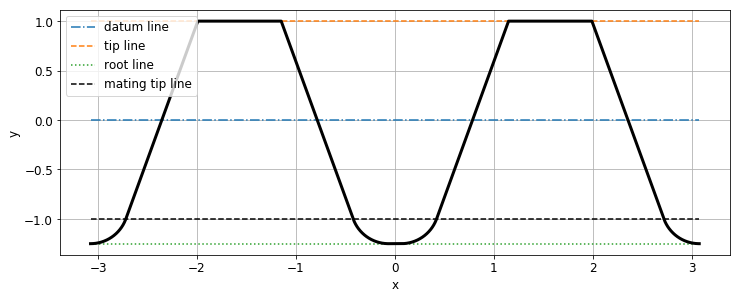

In [21]:
# INPUTS
# ------
module = 1
pressure_angle_deg = 20
addendum_coefficient = 1
dedendum_coefficient = 1.25
root_radius_coefficient = 0.38

# compute properties
pressure_angle = radians(pressure_angle_deg)
addendum = addendum_coefficient * module
dedendum = dedendum_coefficient * module
root_radius_coefficient_max = round(br.max_root_radius(module, pressure_angle, addendum, dedendum) / module, 2)
pitch = round(br.pitch_fcn(module), 2)
base_pitch = round(br.base_pitch_fcn(module, pressure_angle), 2)
bottom_clearance_coefficient = br.bottom_clearance_fcn(addendum, dedendum) / module

# display input variables
headings = ['$m_n$', '$\\alpha_n$', '$h_a^*$', '$h_f^*$', '$\\rho_F^*$', '$\\rho_{F,\\rm{max}}^*$', '$p$', '$p_b$', '$c^*$']
rows = [[f'${module}\\text{{mm}}$', f'${pressure_angle_deg}^\\circ$', f'${addendum_coefficient}$', f'${dedendum_coefficient}$', f'${root_radius_coefficient}$', f'${root_radius_coefficient_max}$', f'${pitch}\\text{{mm}}$', f'${base_pitch}\\text{{mm}}$', f'${bottom_clearance_coefficient}$']]
html_table(headings, rows)

# basic rack coordinate data 
x, y = br.basic_rack_coordinates(module, pressure_angle_deg, addendum_coefficient, dedendum_coefficient, root_radius_coefficient)

# create figure and axes
fig = plt.figure(figsize=[2 * x for x in FIGSIZE])
ax = fig.add_subplot(1, 1, 1)

# plot reference lines (datum, tip, root) and basic rack
xlimits = [min(x), max(x)]
ax.plot(xlimits, [0] * 2, '-.')
ax.plot(xlimits, [addendum] * 2, '--')
ax.plot(xlimits, [-dedendum] * 2, ':')
ax.plot(xlimits, [-addendum] * 2, 'k--')
ax.plot(x, y, 'k', linewidth=3)

# format plot
ax.set_aspect('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['datum line', 'tip line', 'root line', 'mating tip line'], loc='upper left')
plt.grid()
plt.show()

### Undercut

The geometry of an undercut basic rack tooth profile is reviewed here.  Undercut is a geometric feature in the root of a basic rack.  Undercut exists when the rack tooth profile is not tangent to the root geometry, but instead intersects a line oriented at a pressure angle less than the tooth profile pressure angle.

Undercut angle, $\alpha_{FP}$, and undercut size, $U_{FP}$, are used to define the undercut of a basic rack.  These are illustrated in the undercut basic rack below.

<img src="./img/basic_rack_undercut.svg" alt="Undercut basic rack diagram" style="max-height: 300px"/>
<p style="text-align: center; font-weight: bold;">Undercut basic rack tooth profile</p>

Notice the base pitch of the undercut profile, $p_{bP}$, differs from the tooth profile base pitch, $p_b$, despite each profile having the same pitch, $p$.  As we will see in the chapters on spur and helical gear geometry, this difference explains why only gears of the same module and reference pressure angle can mesh.  However, there are some exceptions for the generating tool geometry that will be discussed in the relevant notebooks. 

<div class="alert alert-block alert-info" style="box-shadow: 2px 2px 4px 0px rgba(0, 0, 0, .13);">
    Undercut is of particular interest when using a basic rack as a basis for a generating cutting tool, in which case it is referred to as <i>protuberance</i>.  Later notebooks on gear tooling will elaborate on the usefulness of protuberance for gear manufacturing and design, and its influence on gear root geometry. 
</div>

#### Undercut Basic Rack Plot

By parametrically defining an undercut basic rack, we can produce a piece-wise plot of the resulting geometry.  Below is a such a plot, drawn in the Cartesian xy-plane per the table of  input parameters used to define the undercut basic rack.

$m_n$,$\alpha_n$,$h_a^*$,$h_f^*$,$\rho_F^*$,$\alpha_{FP}$,$U_{FP}$
$1\text{mm}$,$20^\circ$,$1$,$1.25$,$0.38$,$10^\circ$,$0.15\text{mm}$


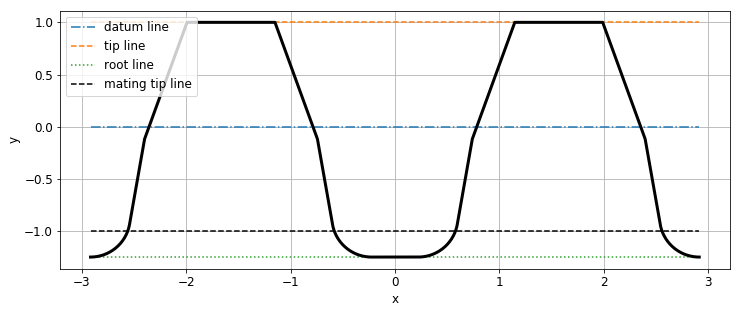

In [22]:
# INPUTS
# ------
module = 1
pressure_angle_deg = 20
addendum_coefficient = 1
dedendum_coefficient = 1.25
root_radius_coefficient = 0.38
undercut_angle_deg = 10
undercut_size = 0.15

# display input variables
headings = ['$m_n$', '$\\alpha_n$', '$h_a^*$', '$h_f^*$', '$\\rho_F^*$', '$\\alpha_{FP}$', '$U_{FP}$']
rows = [[f'${module}\\text{{mm}}$', f'${pressure_angle_deg}^\\circ$', f'${addendum_coefficient}$', f'${dedendum_coefficient}$', f'${root_radius_coefficient}$', f'${undercut_angle_deg}^\\circ$', f'${undercut_size}\\text{{mm}}$']]
html_table(headings, rows)

# undercut basic rack coordinate data 
x, y = br.undercut_basic_rack_coordinates(module, pressure_angle_deg, addendum_coefficient, dedendum_coefficient, root_radius_coefficient, undercut_angle_deg, undercut_size)

# create figure and axes
fig = plt.figure(figsize=[2 * x for x in FIGSIZE])
ax = fig.add_subplot(1, 1, 1)

# plot reference lines (datum, tip, root) and basic rack
xlimits = [min(x), max(x)]
ax.plot(xlimits, [0] * 2, '-.')
ax.plot(xlimits, [addendum_coefficient * module] * 2, '--')
ax.plot(xlimits, [-dedendum_coefficient * module] * 2, ':')
ax.plot(xlimits, [-addendum_coefficient * module] * 2, 'k--')
ax.plot(x, y, 'k', linewidth=3)

# format plot
ax.set_aspect('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['datum line', 'tip line', 'root line', 'mating tip line'], loc='upper left')
plt.grid()
plt.show()

## Types

There are standard and non-standard basic rack tooth profiles.  The standard back rack types have been established by gearing organizations, such as International Standards Organization (ISO) and American Gear Manufacturing Association (AGMA).  Gear manufacturers commonly have tools available to cut cylindrical involute gears with the tooth proportions defined by the standard basic rack types.

Depending on the manufacturing method and manufacturer, non-standard basic racks may be used to define the gear tooth proportions.  A non-standard basic rack is any basic rack that is not a standard type.

### Standard

Standard basic rack types per ISO 53 are defined and illustrated below.  Refer to the standard for complete details.

<table style="margin-left: 0">
    <tr>
        <th></th>
        <th>A</th>
        <th>B</th>
        <th>C</th>
        <th>D</th>
    </tr>
    <tr>
        <td>Pressure angle, $\alpha_n$</td>
        <td>$20^\circ$</td>
        <td>$20^\circ$</td>
        <td>$20^\circ$</td>
        <td>$20^\circ$</td>
    </tr>
    <tr>
        <td>Addendum coefficient, $h_a^*$</td>
        <td>$1.00$</td>
        <td>$1.00$</td>
        <td>$1.00$</td>
        <td>$1.00$</td>
    </tr>
    <tr>
        <td>Dedendum coefficient, $h_f^*$</td>
        <td>$1.25$</td>
        <td>$1.25$</td>
        <td>$1.25$</td>
        <td>$1.40$</td>
    </tr>
    <tr>
        <td>Root radius coefficient, $\rho_F^*$</td>
        <td>$0.38$</td>
        <td>$0.30$</td>
        <td>$0.25$</td>
        <td>$0.39$</td>
    </tr>
</table>

<div class="alert alert-block alert-info" style="box-shadow: 2px 2px 4px 0px rgba(0, 0, 0, .13);">
    Notice the basic rack standard types are only concerned with <i>tooth proportions</i>, not tooth size.  This is why module is excluded. 
</div>

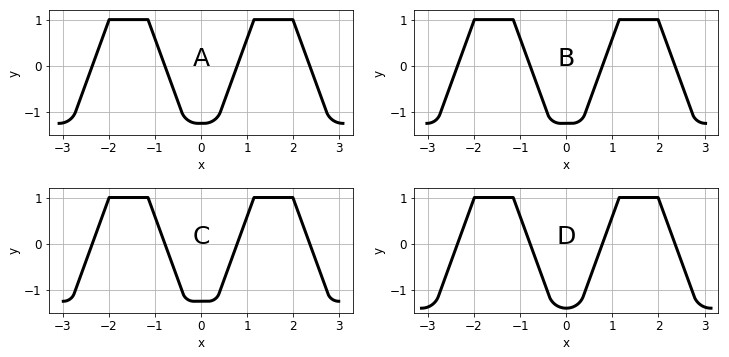

In [23]:
# INPUTS [A, B, C, D]
# -------------------
types = ['A', 'B', 'C', 'D']
modules = [1, 1, 1, 1]  # arbitrary
pressure_angles_deg = [20, 20, 20, 20]
addendum_coefficients = [1, 1, 1, 1]
dedendum_coefficients = [1.25, 1.25, 1.25, 1.4]
root_radius_coefficients = [0.38, 0.3, 0.25, 0.39]

# create figure and axes
fig = plt.figure(figsize=[12, 6])

for i in range(4) :
    ax = fig.add_subplot(2, 2, i+1)
    
    # plot basic rack 
    x, y = br.basic_rack_coordinates(modules[i], pressure_angles_deg[i], addendum_coefficients[i], dedendum_coefficients[i], root_radius_coefficients[i])
    ax.plot(x, y, 'k', linewidth=3)
    
    # annotate
    ax.text(0, 0, types[i], fontsize=25, horizontalalignment='center')

    # format plot
    ax.set_aspect('equal')
    plt.xlim([-3.3, 3.3])
    plt.ylim([-1.5, 1.2])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid()
    
plt.show()

### Non-standard

Non-standard basic rack tooth profiles are defined and illustrated below.  These non-standard racks were arbitrarily defined.

<table style="margin-left: 0">
    <tr>
        <th></th>
        <th>I</th>
        <th>II</th>
        <th>III</th>
        <th>IV</th>
    </tr>
    <tr>
        <td>Pressure angle, $\alpha_n$</td>
        <td>$25^\circ$</td>
        <td>$15^\circ$</td>
        <td>$20^\circ$</td>
        <td>$20^\circ$</td>
    </tr>
    <tr>
        <td>Addendum coefficient, $h_a^*$</td>
        <td>$0.90$</td>
        <td>$1.10$</td>
        <td>$1.00$</td>
        <td>$1.00$</td>
    </tr>
    <tr>
        <td>Dedendum coefficient, $h_f^*$</td>
        <td>$1.15$</td>
        <td>$1.35$</td>
        <td>$1.25$</td>
        <td>$1.25$</td>
    </tr>
    <tr>
        <td>Root radius coefficient, $\rho_F^*$</td>
        <td>$0.30$</td>
        <td>$0.30$</td>
        <td>$0.30$</td>
        <td>$0.30$</td>
    </tr>
    <tr>
        <td>Undercut angle, $\alpha_{FP}$</td>
        <td>-</td>
        <td>-</td>
        <td>$10^\circ$</td>
        <td>$5^\circ$</td>
    </tr>
    <tr>
        <td>Undercut size, $U_{FP}$</td>
        <td>-</td>
        <td>-</td>
        <td>$0.15$</td>
        <td>$0.15$</td>
    </tr>
</table>

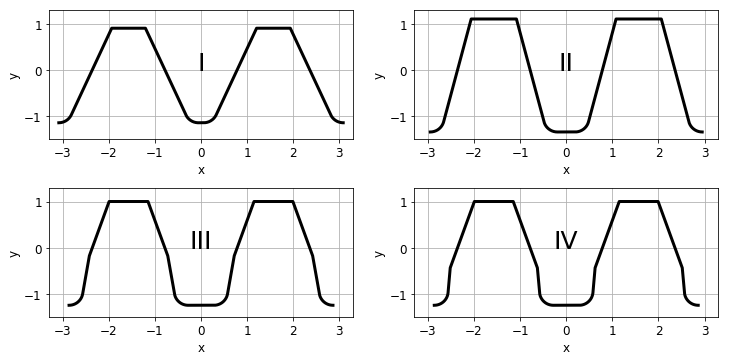

In [24]:
# INPUTS [I, II, III, IV]
# -----------------------
types = ['I', 'II', 'III', 'IV']
modules = [1, 1, 1, 1]  # arbitrary
pressure_angles_deg = [25, 15, 20, 20]
addendum_coefficients = [0.9, 1.1, 1, 1]
dedendum_coefficients = [1.15, 1.35, 1.25, 1.25]
root_radius_coefficients = [0.3, 0.3, 0.3, 0.3]
undercut_angles_deg = [25, 15, 10, 5]
undercut_sizes = [0, 0, 0.15, 0.15]

# create figure and axes
fig = plt.figure(figsize=[12, 6])

for i in range(4) :
    ax = fig.add_subplot(2, 2, i+1)
    
    # plot basic rack 
    if undercut_angles_deg[i] == pressure_angles_deg[i]:
        x, y = br.basic_rack_coordinates(modules[i], pressure_angles_deg[i], addendum_coefficients[i], dedendum_coefficients[i], root_radius_coefficients[i])
    else:
        x, y = br.undercut_basic_rack_coordinates(modules[i], pressure_angles_deg[i], addendum_coefficients[i], dedendum_coefficients[i], root_radius_coefficients[i], undercut_angles_deg[i], undercut_sizes[i])
        
    ax.plot(x, y, 'k', linewidth=3)
    
    # annotate
    ax.text(0, 0, types[i], fontsize=25, horizontalalignment='center')

    # format plot
    ax.set_aspect('equal')
    plt.xlim([-3.3, 3.3])
    plt.ylim([-1.5, 1.3])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid()
    
plt.show()

---

<div class="alert alert-block alert-info" style="box-shadow: 2px 2px 4px 0px rgba(0, 0, 0, .13);">
    <h3>Learn More</h3><br>
    Continue reading the <a href="https://www.drivetrainhub.com/code/notebooks">Drivetrain Hub | Notebook Series</a> to further understand the significance of the basic rack for gear geometry and manufacturing.
</div>

<div class="alert alert-block alert-info" style="box-shadow: 2px 2px 4px 0px rgba(0, 0, 0, .13);">
    <h3>Model Basic Racks</h3><br>
    Accurately model, analyze, and print 3-dimensional gears defined from standard and non-standard basic racks with the <b>Drivetrain Hub | Gears App</b>, a modern drivetrain modeling environment 100% online at <a href="https://www.drivetrainhub.com">www.drivetrainhub.com</a>.
</div>

<div class="alert alert-block alert-info" style="box-shadow: 2px 2px 4px 0px rgba(0, 0, 0, .13);">
    <h3>Improve Notebook</h3><br>
    Our gear geometry notebooks are publicly hosted in a <a href="https://github.com/drivetrainhub/notebooks-gears/">GitHub repository</a>, available for anyone to view and propose edits.
</div>

## References

1.  [ISO 53:1998 Cylindrical gears for general and heavy engineering -- Standard basic rack tooth profile](https://www.iso.org/standard/22643.html)
2.  [Gears and Gear Drives, 1st Edition. Damir Jelaska](https://www.wiley.com/en-us/Gears+and+Gear+Drives-p-9781119941309)
3.  Handbook of Practical Gear Design and Manufacture, 1st Edition. Darle W. Dudley